In [5]:
import pandas as pd
import numpy as np
diabetes_df = pd.read_csv('/content/drive/MyDrive/AI dataset/Datasets-20241202T063912Z-001/Datasets/diabetes.csv')
print("First few rows of the dataset: ")
print(diabetes_df.head())

print("\nData types of each column:")
print(diabetes_df.dtypes)

# Check for missing values
print("\nMissing values per column:")
print(diabetes_df.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(diabetes_df.describe())

# If there are missing values, handle them
if diabetes_df.isnull().sum().sum() > 0:
    # Example: Impute missing values with the column mean
    diabetes_df = diabetes_df.fillna(diabetes_df.mean())
    print("\nAfter imputing missing values:")
    print(diabetes_df.isnull().sum())
else:
    print("\nNo missing values to handle.")

# Separate features (X) and target variable (y)
X = diabetes_df.iloc[:, :-1].values  # All columns except the last
y = diabetes_df.iloc[:, -1].values   # Last column as target

# Train-test split (70%-30%)
np.random.seed(42)
indices = np.random.permutation(len(X))
train_size = int(0.7 * len(X))

train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]


def euclidean_distance(point1, point2):
    """Compute Euclidean distance between two points."""
    return np.sqrt(np.sum((point1 - point2) ** 2))

def predict_single(X_train, y_train, query_point, k=5):
    """Predict the class of a single query point."""
    distances = []

    # Calculate distances from the query point to all training points
    for i, x_train in enumerate(X_train):
        dist = euclidean_distance(query_point, x_train)
        distances.append((dist, y_train[i]))

    # Sort by distance and get the k nearest neighbors
    distances = sorted(distances, key=lambda x: x[0])[:k]

    # Get the majority class
    classes = [neighbor[1] for neighbor in distances]
    prediction = max(set(classes), key=classes.count)
    return prediction

def predict_all(X_train, y_train, X_test, k=5):
    """Predict the classes for all test points."""
    predictions = []
    for query_point in X_test:
        pred = predict_single(X_train, y_train, query_point, k)
        predictions.append(pred)
    return predictions


def accuracy_score(y_true, y_pred):
    """Calculate accuracy."""
    correct = np.sum(y_true == y_pred)
    return correct / len(y_true)

# Predict on the test set
y_pred = predict_all(X_train, y_train, X_test, k=5)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of KNN model: {accuracy * 100:.2f}%")

First few rows of the dataset: 
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Data types of each column:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction   

Problem2


In [17]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Step 1: Define feature matrix (X) and target variable (y)
X = diabetes_df.iloc[:, :-1].values  # All columns except the last as features
y = diabetes_df.iloc[:, -1].values   # Last column as target variable

# Step 2: Train-test split (70%-30%)
np.random.seed(42)  # Ensure reproducibility
indices = np.random.permutation(len(X))  # Shuffle indices

train_size = int(0.7 * len(X))  # 70% for training
train_indices = indices[:train_size]
test_indices = indices[train_size:]

# Split data into train and test sets
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

# Step 3: Scale the dataset (using Min-Max Scaling)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split scaled data into train and test sets
X_train_scaled, X_test_scaled = X_scaled[train_indices], X_scaled[test_indices]

# Confirm shapes
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

# Step 4: Implement KNN functions
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def predict_single(X_train, y_train, query_point, k):
    distances = [euclidean_distance(query_point, x) for x in X_train]
    k_neighbors = np.argsort(distances)[:k]
    k_neighbor_labels = y_train[k_neighbors]
    prediction = np.bincount(k_neighbor_labels).argmax()
    return prediction

def predict_all(X_train, y_train, X_test, k):
    predictions = [predict_single(X_train, y_train, x, k) for x in X_test]
    return np.array(predictions)

# Step 5: Predict on original data and scaled data
k = 5  # Number of neighbors

# Predictions and accuracy for original data
y_pred_original = predict_all(X_train, y_train, X_test, k)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Accuracy without scaling: {accuracy_original * 100:.2f}%")

# Predictions and accuracy for scaled data
y_pred_scaled = predict_all(X_train_scaled, y_train, X_test_scaled, k)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with scaling: {accuracy_scaled * 100:.2f}%")

X_train_scaled shape: (537, 8)
X_test_scaled shape: (231, 8)
Accuracy without scaling: 71.43%
Accuracy with scaling: 73.16%


Problem3

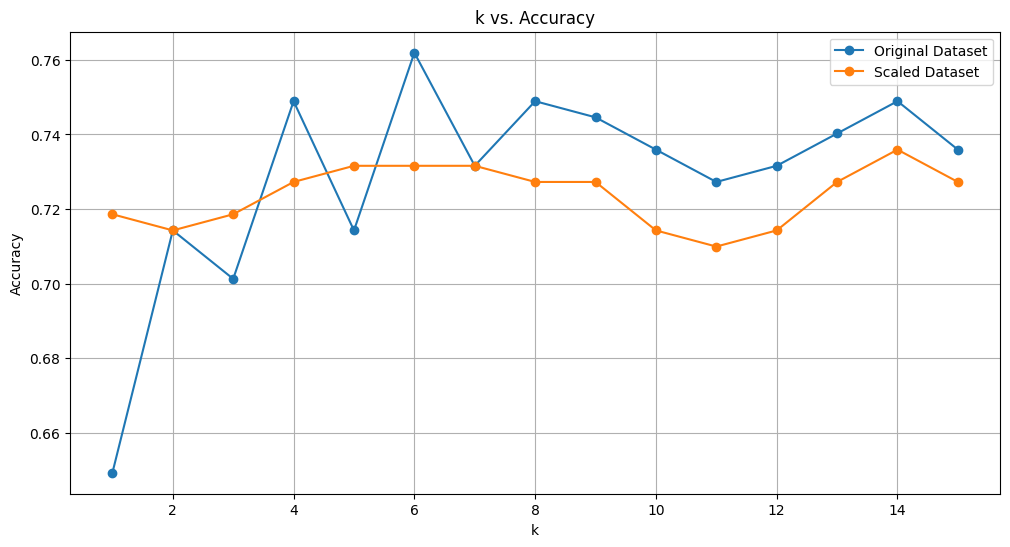

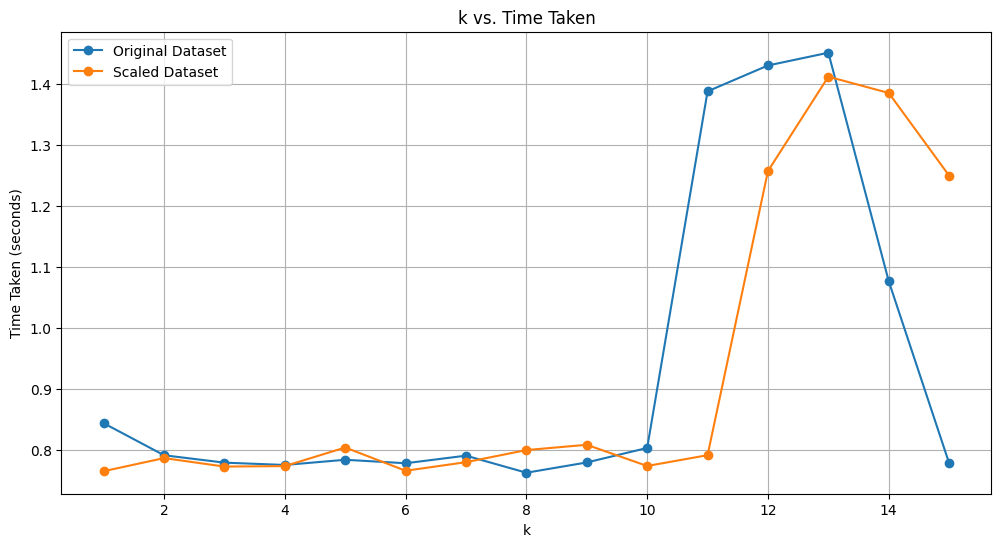

In [18]:
import matplotlib.pyplot as plt
import time  # Importing time module

# Function to record accuracy and timing for different k
def evaluate_knn_for_k(X_train, y_train, X_test, y_test, k_range):
    accuracies = []
    times = []
    for k in k_range:
        start_time = time.time()
        y_pred = predict_all(X_train, y_train, X_test, k)  # Predict for all test samples
        end_time = time.time()

        # Calculate accuracy and record time
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
        times.append(end_time - start_time)
    return accuracies, times

# Define the range of k values
k_values = range(1, 16)

# Evaluate for original dataset
acc_original, time_original = evaluate_knn_for_k(X_train, y_train, X_test, y_test, k_values)

# Evaluate for scaled dataset
acc_scaled, time_scaled = evaluate_knn_for_k(X_train_scaled, y_train, X_test_scaled, y_test, k_values)

# Plot k vs. Accuracy
plt.figure(figsize=(12, 6))
plt.plot(k_values, acc_original, label='Original Dataset', marker='o')
plt.plot(k_values, acc_scaled, label='Scaled Dataset', marker='o')
plt.title('k vs. Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot k vs. Time Taken
plt.figure(figsize=(12, 6))
plt.plot(k_values, time_original, label='Original Dataset', marker='o')
plt.plot(k_values, time_scaled, label='Scaled Dataset', marker='o')
plt.title('k vs. Time Taken')
plt.xlabel('k')
plt.ylabel('Time Taken (seconds)')
plt.legend()
plt.grid()
plt.show()

